<h1><font color='orange'>IT Betyár - Gépi tanulás</font></h1>

<img src="https://www.itbetyar.hu/dload_itb/itbetyar-cifar10-minta.webp" alt="IT Betyár Cifar minta" width="400"><br>
<h3><font color='lightcyan'>Neurális háló feltanítása és tesztelése</font></h3>

1.   Bevezetés a mesterséges intelligencia fejlesztésbe
2.   **Neurális háló** feltanítása
3.   A létrehozott modell tesztelése

Autó, kutya, béka, repülő, macska, szarvas ... stb beazonosítása

<h3><font color='orange'>1. Első lépés: A szükséges programozási könyvtárak importálása</font></h3>


In [1]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h3><font color='orange'>2. lépés - A tanítási adatok - adatállomány betöltése</font></h3>


*   A gépi tanuláshoz rengeteg adatra, jelen esetben képre van szükség.<br>
*   A torontói egyetem jóvoltából létezik a "CIFAR10" névre hallgató képállomány.<br>

Benne 60,000 felvétel. Mivel ez egy tanulásra előkészített adat, ezért egy sor kóddal ezt be tudjuk tölteni.

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


<h3><font color='orange'>3. A neurális hálózat (NN) felépítése tanuláshoz</font></h3>
Alábbi kódban meghatározzuk az NN rétegeit és a tanulási folyamat főbb paramétereit.

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = cnn.fit(X_train, y_train, epochs=9, validation_data=(X_test, y_test))

# FONTOS >> A tanitas lefutasat meg kell varni ez tobb percet vesz igenybe

Epoch 1/9
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4707 - accuracy: 0.4702 - val_loss: 1.2014 - val_accuracy: 0.5813
Epoch 2/9
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1317 - accuracy: 0.6020 - val_loss: 1.0803 - val_accuracy: 0.6241
Epoch 3/9
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0116 - accuracy: 0.6484 - val_loss: 1.0369 - val_accuracy: 0.6388
Epoch 4/9
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9335 - accuracy: 0.6757 - val_loss: 0.9686 - val_accuracy: 0.6684
Epoch 5/9
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8663 - accuracy: 0.6992 - val_loss: 0.9559 - val_accuracy: 0.6730
Epoch 6/9
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8120 - accuracy: 0.7173 - val_loss: 0.9924 - val_accuracy: 0.6620
Epoch 7/9
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7744 - accuracy: 0.7308 - val_loss: 0.9116 - val_ac

<h3><font color='lightcyan'>Fontos!! Tesztelés előtt várd meg, amíg lefut a tanítás lásd fönt!</font></h3>
<h3><font color='orange'>4. A feltanított neurális háló tesztelése</font></h3>
Itt elsőre a feltanításhoz is használt 'cifar10' adatset, teszt részében szereplő képek közül választunk ki párat random.<br> Majd megkérjük a frissen feltanított modellt, hogy állapítsa meg, hogy mi található a képen?!
<p><font color='darkorange'>Itt is csak nyomd meg a play gombot, a kis tesztképek meg fognak jelenni a kód alatt!</font></p>

1/1 [==============================] - 0s 23ms/step


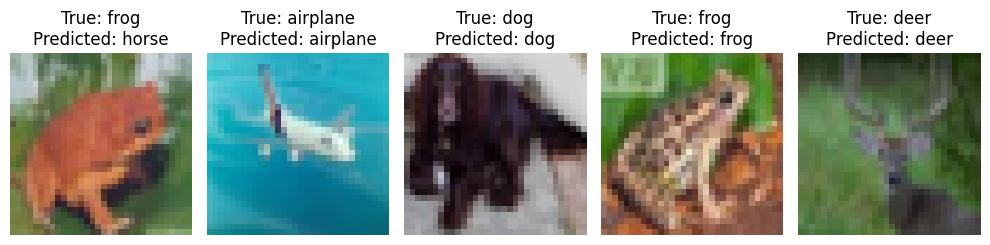

In [5]:
def display_images(images, labels, predictions, classes, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {classes[labels[i][0]]}\nPredicted: {classes[predictions[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Pár kép random kiválasztása a teszt adatállományból
num_images_to_display = 5
random_indices = np.random.choice(len(X_test), num_images_to_display, replace=False)
images_to_display = X_test[random_indices]
labels_to_display = y_test[random_indices]

predictions = np.argmax(cnn.predict(images_to_display), axis=-1)

display_images(images_to_display, labels_to_display, predictions, classes)



# <h3><font color='orange'>5.1 Itt tetszőleges saját képet tölthetünk fel, teszteléshez.</font></h3>
- Futtathatod alább kódot is, meg fog jelenni egy upload gomb.<br>
- Feltölthetsz több képet is, a következő kód mindegyiket átnézi

In [6]:
from google.colab import files
uploaded = files.upload()

# Access the uploaded image(s)
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

Saving bird2.jpg to bird2.jpg
Saving car.jpg to car.jpg
Saving dog1.jpg to dog1.jpg
Saving paci2.jpg to paci2.jpg
Uploaded file: bird2.jpg
Uploaded file: car.jpg
Uploaded file: dog1.jpg
Uploaded file: paci2.jpg


<h3><font color='orange'>5.2 Az előbbi lépésben feltöltött képeket tesztelheted itt</font></h3>

1/1 [==============================] - 0s 21ms/step


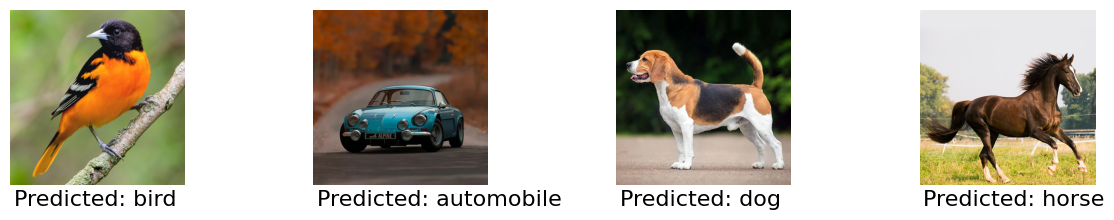

In [7]:
from keras.preprocessing.image import load_img, img_to_array
import io

num_images_to_display = len(uploaded)  # Minden kep tesztelese

plt.figure(figsize=(15, 5))

for idx, (filename, file_content) in enumerate(uploaded.items(), start=1):
    plt.subplot(2, num_images_to_display, idx)

    orig_img = load_img(io.BytesIO(file_content))

    img = load_img(io.BytesIO(file_content), target_size=(32, 32))  # Target meret
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    processed_img = img_array / 255.0  # Normalizalas

    prediction = cnn.predict(processed_img)
    predicted_class = np.argmax(prediction)

    plt.imshow(orig_img)
    plt.axis('off')
    predicted_label = classes[predicted_class]

    text_y = orig_img.size[1] + 60
    plt.text(10, text_y, f"Predicted: {predicted_label}", fontsize=16)

plt.show()